In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
import math
import pandas as pd
%matplotlib inline

In [2]:
def initsys(L):
    arr_init=np.random.randint(2,size=(L,L))
    for i in range(L):
        for j in range(L):
            if arr_init[i][j]<1:
                arr_init[i][j] = -1
    return arr_init

In [3]:
def neighbors(arr,i,j,L):
    neighbordic = [(i,(j+1)%L),(i,j-1),((i+1)%L,j),(i-1,j)]
    return neighbordic

In [4]:
def siteE(arr,i,j,L):
    E=0
    J=-1
    for neighbor in neighbors(arr,i,j,L):
        E+=J*(arr[neighbor]*arr[i][j])
    return E

In [5]:
def totalE(arr,L):
    E=0
    for i in range(L):
        for j in range(L):
            E+=siteE(arr,i,j,L)/2
    return E

In [6]:
def S(Corr,qx,qy,L):
    s=0
    for i in range(L):
        for j in range(L):
            s+=math.cos(qx*i+qy*j)*Corr[i][j]
    return s

def corr_length(Corr,L):
    corrlength=math.sqrt(S(Corr,0,0,L)/S(Corr,2*math.pi/L,0,L)-1)
    corrlength=corrlength/(2*math.pi/L)
    return corrlength

In [8]:
#trail all
def Metropoly(arr,steps,L,T):
    kb=1
    beta=1/(kb*T)
    Msum=[]
    M2sum=[]
    Esum=[]
    E2sum=[]
    E=totalE(arr,L)
    xs=[i for i in range(L)]
    ys=[j for j in range(L)]
    random.shuffle(xs)
    random.shuffle(ys)
    Corr=np.zeros((L,L))
    for step in range(steps):
        M=np.sum(np.abs(arr))
        for (x,y) in itertools.product(xs,ys):
            dE=-2*siteE(arr,x,y,L)
            W=math.exp(-dE*beta)
            accprob=min(1,W)
            randomnumb=np.random.random()
            if accprob>randomnumb:
                arr[x][y] = -arr[x][y]
        for i in range(L):
            for j in range(L):
                Corr[i][j]+=arr[0][0]*arr[i][j]
        M=np.sum(arr)
        E=totalE(arr,L)
        Msum.append(abs(M))
        M2sum.append(M**2)
        Esum.append(E)
        E2sum.append(E**2)
    Mavg=sum(Msum)/steps
    M2avg=sum(M2sum)/steps
    Eavg=sum(Esum)/steps
    E2avg=sum(E2sum)/steps
    Corr=Corr/steps
    chi=(M2avg-Mavg**2)*beta
    chi=chi/(L**2)
    C=(E2avg-Eavg**2)*beta/T
    C=C/(L**2)
    Mavg=Mavg/(L**2)
    Eavg=Eavg/(L**2)
    colength=corr_length(Corr,L)
    return Mavg,Eavg,chi,C,colength

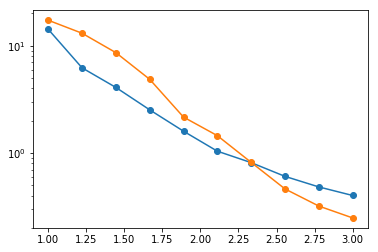

In [25]:
#test
Ls=[4,8]
Ts=np.linspace(1,3,10)
for L in Ls:
    ylist=[]
    arr=initsys(L)
    for T in Ts:
        _,_,_,_,colength=Metropoly(arr,10000,L,T)
        ylist.append(colength/L)
    plt.plot(Ts,ylist,'o-')
    plt.yscale('log')

D:\python\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in long_scalars


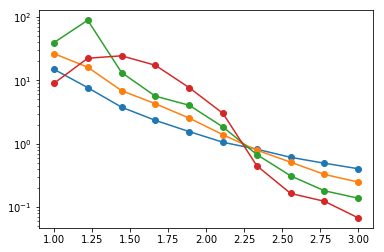

In [11]:
#test
Ls=[4,8,16,32]
Ts=np.linspace(1,3,10)
for L in Ls:
    ylist=[]
    arr=initsys(L)
    for T in Ts:
        _,_,_,_,colength=Metropoly(arr,10000,L,T)
        ylist.append(colength/L)
    plt.plot(Ts,ylist,'o-')
    plt.yscale('log')

In [11]:
#saving correlation length
Ls=[4,8,16,32]
Trange=np.linspace(1,3,10)
for L in Ls:
    arr=initsys(L)
    colength_list=[]
    for T in Trange:
        _,_,_,_,colength=Metropoly(arr,10000,L,T)
        colength_list.append(colength)
    df = pd.DataFrame({'T':Trange, 'colength':colength_list})
    df.to_csv('colength L=%.d.csv'%L)

D:\python\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in long_scalars


In [12]:
#saving correlation length2
Ls=[4,8,16,32]
Trange=np.linspace(2,2.75,10)
for L in Ls:
    arr=initsys(L)
    colength_list=[]
    for T in Trange:
        _,_,_,_,colength=Metropoly(arr,10000,L,T)
        colength_list.append(colength)
    df = pd.DataFrame({'T':Trange, 'colength':colength_list})
    df.to_csv('colength L=%.d zoom in.csv'%L)

D:\python\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in long_scalars


In [9]:
#saving correlation length3
Ls=[4,8,16,32]
Trange=np.linspace(2.1,2.4,10)
for L in Ls:
    arr=initsys(L)
    colength_list=[]
    for T in Trange:
        _,_,_,_,colength=Metropoly(arr,10000,L,T)
        colength_list.append(colength)
    df = pd.DataFrame({'T':Trange, 'colength':colength_list})
    df.to_csv('colength L=%.d zoom in2.csv'%L)

D:\python\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in long_scalars


In [ ]:
#saving correlation length3
Ls=[4,8,16,32]
Trange=np.linspace(2.25,2.32,10)
for L in Ls:
    arr=initsys(L)
    colength_list=[]
    for T in Trange:
        _,_,_,_,colength=Metropoly(arr,10000,L,T)
        colength_list.append(colength)
    df = pd.DataFrame({'T':Trange, 'colength':colength_list})
    df.to_csv('colength L=%.d zoom in3.csv'%L)

In [12]:
Ls=[4,8,16,32]
Trange=[2.272,2.273]
for L in Ls:
    arr=initsys(L)
    colength_list=[]
    for T in Trange:
        _,_,_,_,colength=Metropoly(arr,100000,L,T)
        colength_list.append(colength)
    df = pd.DataFrame({'T':Trange, 'colength':colength_list})
    df.to_csv('for nu2 L=%.d.csv'%L)

D:\python\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in long_scalars
